In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('./cleaned/CleanedSubmissions.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506 entries, 0 to 1505
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CompanyID         1506 non-null   object 
 1   Company           1506 non-null   object 
 2   2019 Volume       1011 non-null   float64
 3   2020 Volume       1080 non-null   float64
 4   2021 Volume       1101 non-null   float64
 5   2022 Volume       1337 non-null   float64
 6   2023 Volume       1506 non-null   int64  
 7   2019 Sides        1011 non-null   float64
 8   2020 Sides        1080 non-null   float64
 9   2021 Sides        1101 non-null   float64
 10  2022 Sides        1337 non-null   float64
 11  2023 Sides        1506 non-null   int64  
 12  City              1506 non-null   object 
 13  State             1506 non-null   object 
 14  Country Code      1506 non-null   object 
 15  Referral Network  1506 non-null   object 
 16  Logo              1503 non-null   object 


In [3]:
df.describe()

,2019 Volume,2020 Volume,2021 Volume,2022 Volume,2023 Volume,2019 Sides,2020 Sides,2021 Sides,2022 Sides,2023 Sides,Avg Home Price
count,"1,011.00","1,080.00","1,101.00","1,337.00","1,506.00","1,011.00","1,080.00","1,101.00","1,337.00","1,506.00","1,506.00"
mean,"1,364,890,296.02","1,606,023,607.40","2,170,319,473.85","1,749,984,392.06","1,365,653,401.24","3,677.20","3,982.03","4,501.05","3,460.99","2,696.57","498,588.01"
std,"7,623,001,011.09","9,072,109,424.39","13,100,298,878.08","10,929,915,541.44","8,520,899,956.79","16,003.51","17,515.13","21,380.90","17,756.25","14,116.40","439,824.88"
min,"64,467,142.00","69,112,988.00","69,534,513.00","6,754,137.00","801,000.00",500.00,504.00,505.00,13.00,1.00,"118,991.00"
25%,"245,599,806.00","282,904,006.75","349,773,613.00","310,729,624.85","247,425,719.25",963.00,"1,005.00","1,086.00",840.50,649.50,"293,098.00"
50%,"440,619,533.00","513,100,143.00","655,422,593.00","539,796,331.34","439,614,739.50","1,538.00","1,559.00","1,664.00","1,304.00","1,032.00","392,388.00"
75%,"933,366,129.50","1,071,965,214.75","1,353,661,980.00","1,095,259,837.00","868,818,813.25","2,860.00","2,995.75","3,197.00","2,427.00","1,899.75","556,690.75"
max,"170,000,000,000.00","185,000,000,000.00","251,000,000,000.00","227,977,362,940.00","184,452,364,253.00","329,680.00","343,220.00","388,098.00","397,138.00","355,052.00","8,212,756.00"


In [4]:
df = (
pd.DataFrame({
    'company_id': df['CompanyID'].to_list() * 5,
    'company': df['Company'].to_list() * 5,
    'volume': df['2019 Volume'].to_list() + df['2020 Volume'].to_list() + df['2021 Volume'].to_list() + df['2022 Volume'].to_list() + df['2023 Volume'].to_list(),
    'sides': df['2019 Sides'].to_list() + df['2020 Sides'].to_list() + df['2021 Sides'].to_list() + df['2022 Sides'].to_list() + df['2023 Sides'].to_list(),
    'referrer': df['Referral Network'].to_list() * 5,
    'year': [2019] * len(df['2019 Volume']) + [2020] * len(df['2020 Volume']) + [2021] * len(df['2021 Volume']) + [2022] * len(df['2022 Volume']) + [2023] * len(df['2023 Volume']) ,
    'city': df['City'].to_list() * 5,
    'state': df['State'].to_list() * 5, 
    'country': df['Country Code'].to_list() * 5, 
    'logo': df['Logo'].to_list() * 5
})
)
# billions
df['volume'] = df.volume / 1000000000
# millions
df['sides'] = df.sides / 1000000

In [5]:
df.head()

,company_id,company,volume,sides,referrer,year,city,state,country,logo
0,reczKnazN8kUWC7Ia,Seven Gables Real Estate,NaN,NaN,LeadingRE,2019,Tustin,CA,US,7.png (https://v5.airtableusercontent.com/v3/u...
1,recn0HaY78aRYlVnf,"Stark Real Estate Operations, LLC",0.71,0.00,LeadingRE,2019,Ficthburg,WI,US,Stark_Logo__Real_People_Tagline.jpg (https://v...
2,recR8yxovQcfGnqBc,Keller Williams Main Line,NaN,NaN,Keller Williams,2019,Ardmore,PA,US,kellerwilliams_prim_logo_pms200.png (https://v...
3,reccrsQM3YrT1nMgO,Keller Williams Success Realty,1.21,0.00,Keller Williams,2019,South Ogden,UT,US,kellerwilliams_prim_logo_pms200.png (https://v...
4,recsWmbo7T6v00rYa,CENTURY 21 North East,1.23,0.00,CENTURY 21,2019,Peabody,MA,US,38V3SivORu6asYe0CMAi (https://v5.airtableuserc...


In [6]:
df['volume_ranking'] = df.groupby(['year'])['volume'].rank(ascending=False)
df['pct_volume'] = df['volume'] / df.groupby('year')['volume'].transform('sum')
df['sides_ranking'] = df.groupby(['year'])['sides'].rank(ascending=False)
df['pct_sides'] = df['sides'] / df.groupby('year')['sides'].transform('sum')
df

,company_id,company,volume,sides,referrer,year,city,state,country,logo,volume_ranking,pct_volume,sides_ranking,pct_sides
0,reczKnazN8kUWC7Ia,Seven Gables Real Estate,NaN,NaN,LeadingRE,2019,Tustin,CA,US,7.png (https://v5.airtableusercontent.com/v3/u...,NaN,NaN,NaN,NaN
1,recn0HaY78aRYlVnf,"Stark Real Estate Operations, LLC",0.71,0.00,LeadingRE,2019,Ficthburg,WI,US,Stark_Logo__Real_People_Tagline.jpg (https://v...,332.00,0.00,298.00,0.00
2,recR8yxovQcfGnqBc,Keller Williams Main Line,NaN,NaN,Keller Williams,2019,Ardmore,PA,US,kellerwilliams_prim_logo_pms200.png (https://v...,NaN,NaN,NaN,NaN
3,reccrsQM3YrT1nMgO,Keller Williams Success Realty,1.21,0.00,Keller Williams,2019,South Ogden,UT,US,kellerwilliams_prim_logo_pms200.png (https://v...,190.00,0.00,179.00,0.00
4,recsWmbo7T6v00rYa,CENTURY 21 North East,1.23,0.00,CENTURY 21,2019,Peabody,MA,US,38V3SivORu6asYe0CMAi (https://v5.airtableuserc...,186.00,0.00,210.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7525,recsaET9TOnpTdUo2,RE/MAX Victory + Affiliates,0.38,0.00,RE/MAX,2023,Beavercreek,OH,US,remax_logo (1).png (https://v5.airtableusercon...,860.00,0.00,513.00,0.00
7526,recXPNlNcArOkH07v,RE/MAX Boone Realty,0.40,0.00,RE/MAX,2023,Columbia,MO,US,9zzEelRSTXqk1lYzuN0J (https://v5.airtableuserc...,806.00,0.00,518.00,0.00
7527,recfhN2sXBlhbLrB8,Levi Rodgers Real Estate,0.34,0.00,Independent/Other,2023,San Antonio,TX,US,Full_color_trans.png (https://v5.airtableuserc...,925.00,0.00,733.50,0.00
7528,recjfaNGwehRz3OQ0,Keller Williams Realty Baz Investments,0.29,0.00,Keller Williams,2023,Oak Lawn,IL,US,kellerwilliams_prim_logo_pms200.png (https://v...,"1,031.00",0.00,"1,003.00",0.00


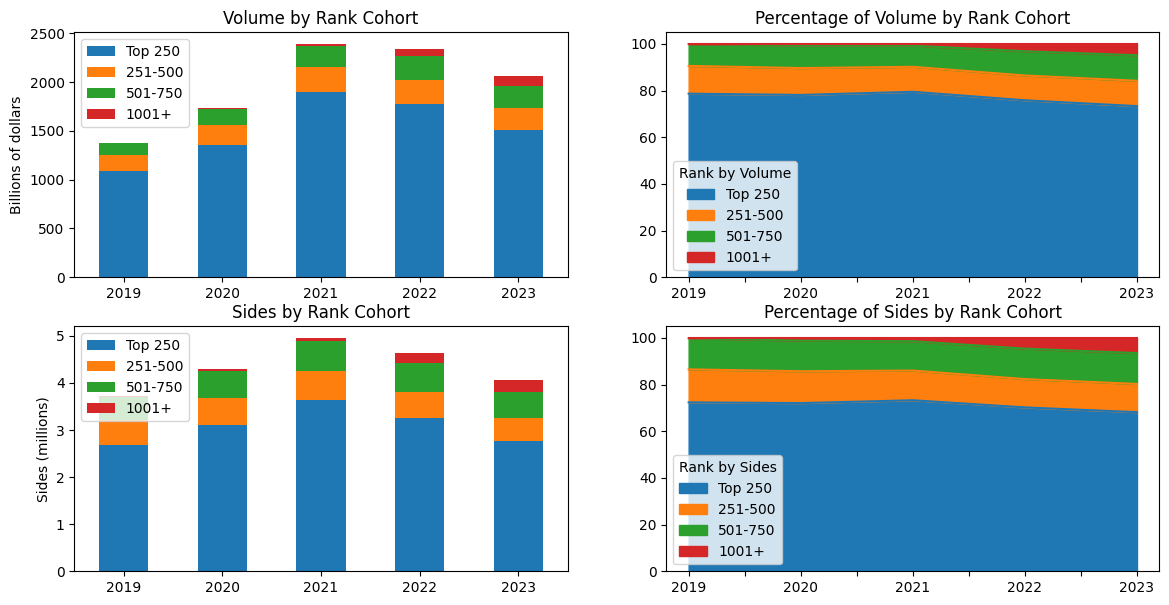

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, squeeze=True)
fig.set_figwidth(14)
fig.set_figheight(7)

# binned volume
df['volume_bin'] = ['Top 250' if x <=250 else '251-500' if x <= 500 else '501-750' if x <= 1000 else '1001+' for x in df.volume_ranking]
binned = df[['year','volume_bin','volume']].groupby(['year', 'volume_bin']).sum().reset_index().pivot(
                index='year', columns='volume_bin', values='volume'
            )
binned.index = binned.index.astype('str')
binned.columns.name = 'Rank by Volume'
binned[['Top 250', '251-500', '501-750', '1001+']].plot(
    kind='bar', stacked=True, title='Volume by Rank Cohort', xlabel='', ylabel='Billions of dollars', rot=0,
    ax=axes[0,0]).legend(loc='upper left')

# binned volume percentages
binned_percs = df[['year', 'volume_bin', 'pct_volume']].groupby(['year', 'volume_bin']).sum().reset_index().pivot(
                    index='year', columns='volume_bin', values='pct_volume'
                )
binned_percs.index = binned_percs.index.astype('str')
binned_percs.columns.name = 'Rank by Volume'
binned_percs = binned_percs * 100
binned_percs[['Top 250', '251-500', '501-750', '1001+']].plot(
    kind='area', stacked=True, title='Percentage of Volume by Rank Cohort', xlabel='', ylabel='',
    ax=axes[0,1])

# binned sides
df['sides_bin'] = ['Top 250' if x <=250 else '251-500' if x <= 500 else '501-750' if x <= 1000 else '1001+' for x in df.sides_ranking]
binned_sides = df[['year','sides_bin','sides']].groupby(['year', 'sides_bin']).sum().reset_index().pivot(
                index='year', columns='sides_bin', values='sides'
            )
binned_sides.index = binned_sides.index.astype('str')
binned_sides.columns.name = 'Rank by Sides'
binned_sides[['Top 250', '251-500', '501-750', '1001+']].plot(
    kind='bar', stacked=True, title='Sides by Rank Cohort', xlabel='', ylabel='Sides (millions)', rot=0,
    ax=axes[1,0]).legend(loc='upper left')

# binned volume percentages
binned_sides_percs = df[['year', 'sides_bin', 'pct_sides']].groupby(['year', 'sides_bin']).sum().reset_index().pivot(
                    index='year', columns='sides_bin', values='pct_sides'
                )
binned_sides_percs.index = binned_sides_percs.index.astype('str')
binned_sides_percs.columns.name = 'Rank by Sides'
binned_sides_percs = binned_sides_percs * 100
binned_sides_percs[['Top 250', '251-500', '501-750', '1001+']].plot(
    kind='area', stacked=True, title='Percentage of Sides by Rank Cohort', xlabel='', ylabel='',
    ax=axes[1,1])

_ = plt.show()